# Building an Image Classifier Using the Sequential API

First, we need to load a dataset. We will tackle Fashion MNIST, which
is a drop-in replacement of MNIST. It has the exact same
format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes),
but the images represent fashion items rather than handwritten digits, so each class is
more diverse, and the problem turns out to be significantly more challenging than
MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST,
but only about 83% on Fashion MNIST.

In [117]:
# Turn of Warnings
import warnings
warnings.filterwarnings("ignore")

# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [118]:
# import os
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [119]:
# use this to bypass errors
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [120]:
# load fashion-mnist dataset
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [121]:
# shape of data
X_train_full.shape

(60000, 28, 28)

In [122]:
# datatype
X_train_full.dtype

dtype('uint8')

In [123]:
# Preprocessing the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [124]:
# Define class labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

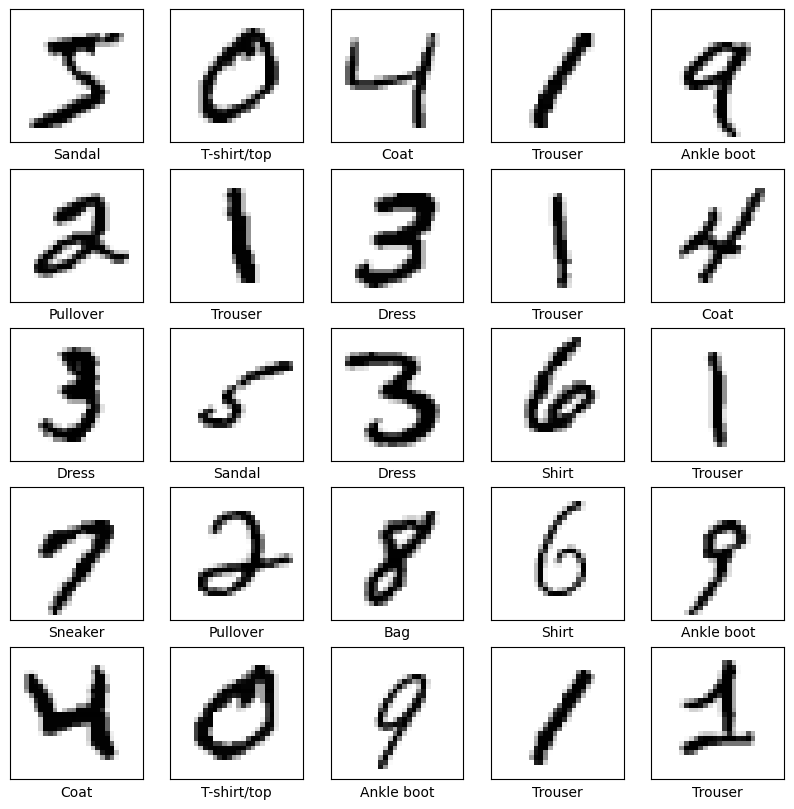

In [125]:
# Visualize some example images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [126]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [128]:
# Model Summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 300)               235500    
                                                                 
 dense_27 (Dense)            (None, 100)               30100     
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 19s 10ms/step - loss: 0.2097 - accuracy: 0.9369 - val_loss: 0.1005 - val_accuracy: 0.9692
Epoch 2/20
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0883 - accuracy: 0.9721 - val_loss: 0.0772 - val_accuracy: 0.9748
Epoch 3/20
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.1066 - val_accuracy: 0.9686
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.0713 - val_accuracy: 0.9778
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0769 - val_accuracy: 0.9786
Epoch 6/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0848 - val_accuracy: 0.9780
Epoch 7/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0752 - val

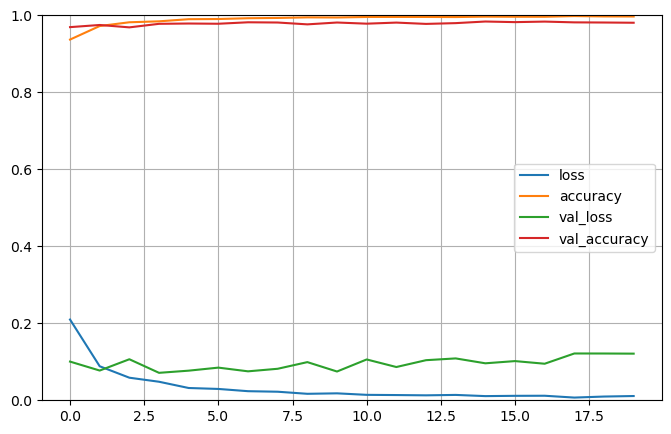

In [130]:
# visualize the models performance
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [131]:
# Make Prediction
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 32.4937 - accuracy: 0.9797


[32.493736267089844, 0.9797000288963318]

In [143]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 80ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [161]:
y_pred = model.predict(X_new).astype('int')
y_pred

1/1 [==============================] - 0s 40ms/step


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [162]:
# Print out the corresponding labels
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'Trouser',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [170]:
# Make predictions
predictions = model.predict(X_test)
prediction_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 5s 16ms/step


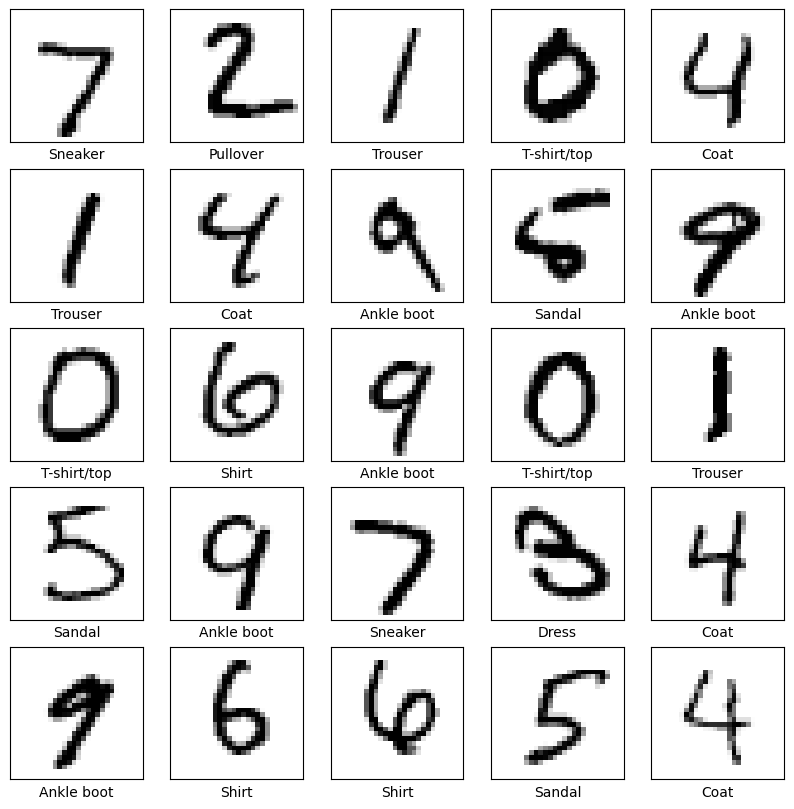

In [171]:
# Visualize prediction

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[prediction_labels[i]])
plt.show()

In [173]:
# Save the model
model.save("model.h5")

We can see that our models performed very well, if you compare the class labels in visualize prediction and visualize examples 

# FASHION-MNIST PROJECT WITH DEEP LEARNING AND KERAS 